|课程名称：数据挖掘|学生姓名：邓力予|学生学号：20201910442|
|-|-|-|
|实验名称：第五章|
|学院：数学与统计学院|专业：数据科学与大数据技术|年级：2020级|

# 导入需要的包

In [27]:
from pandas import read_csv,DataFrame
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression
from numpy import log,sqrt
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels import api as sm
from sklearn.metrics import mean_squared_error

# 实验一

## 读取数据

In [2]:
data_lab1_meta=read_csv("./练习数据Datasets/insurance.csv")

### 分布频数

- 性别

In [3]:
print(data_lab1_meta["sex"].value_counts())

male      676
female    662
Name: sex, dtype: int64


- 是否吸烟

In [4]:
print(data_lab1_meta["smoker"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


- 地区

In [5]:
print(data_lab1_meta["region"].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


- 孩子数量

In [6]:
print(data_lab1_meta["children"].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


### 对数转换

变量类型转换

In [7]:
data_lab1_meta.replace({"smoker":{"yes":True,"no":False},"region":{"northeast":0,"northwest":1,"southeast":3,"southwest":4},"sex":{"female":0,"male":1}},inplace=True)

- 因变量对数转换

In [8]:
data_lab1_meta["expenses"]=log(data_lab1_meta["expenses"])

## 拆分数据集

- 拆分测试集和训练集

In [9]:
data_lab1_train,data_lab1_test=train_test_split(data_lab1_meta,train_size=0.7)

- 拆分自变量和因变量

In [10]:
data_lab1_train_x=data_lab1_train.iloc[:,:-1]
data_lab1_train_y=data_lab1_train.iloc[:,-1]
data_lab1_test_x=data_lab1_test.iloc[:,:-1]
data_lab1_test_y=data_lab1_test.iloc[:,-1]

## 线性模型

### 建立线性模型

In [11]:
model_lab1_liner=LinearRegression()
model_lab1_liner.fit(data_lab1_train_x,data_lab1_train_y)

LinearRegression()

预测

In [ ]:
data_lab1_liner_pre_y=model_lab1_liner.predict(data_lab1_test_x)

### 模型诊断图

中文和负号的正常显示

In [13]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

- 绘图

C:\Users\dly20\AppData\Local\Temp\ipykernel_14596\3485654383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data_lab1_liner_pre_y, bins=10, fit=stats.norm, norm_hist=True,


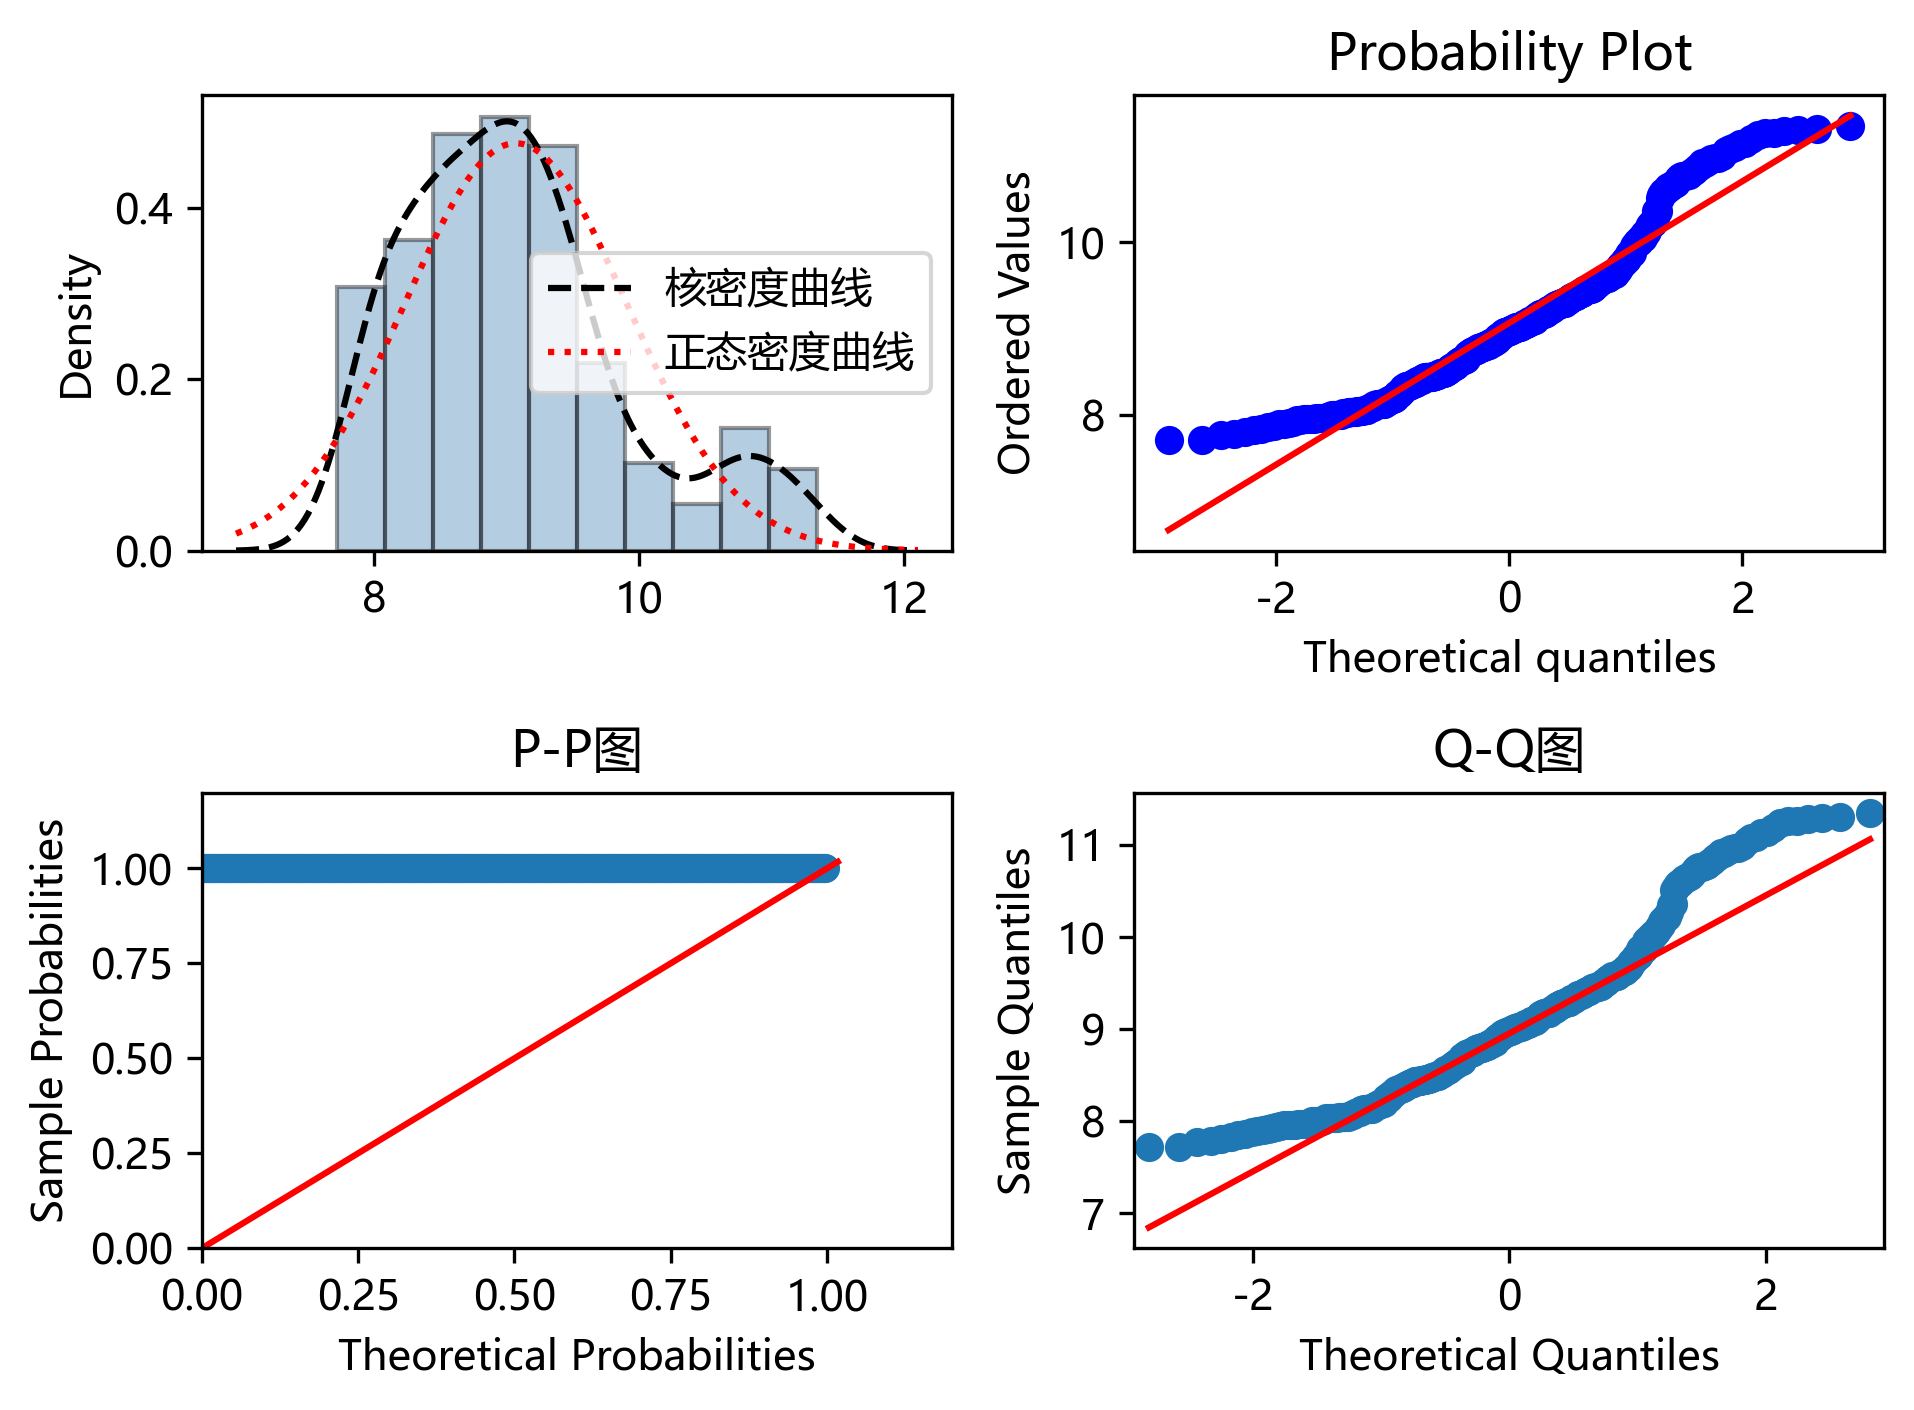

In [14]:
fig,ax=plt.subplots(2,2,dpi=300)
#绘制直方图
sns.distplot(a=data_lab1_liner_pre_y, bins=10, fit=stats.norm, norm_hist=True,
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'label':'核密度曲线'},
             fit_kws={'color':'red', 'linestyle':':', 'label':'正态密度曲线'},
             ax=ax[0][0])
#显示图例
ax[0][0].legend()

pp_qq_plot = sm.ProbPlot(data_lab1_liner_pre_y)
#PP图
pp_qq_plot.ppplot(line='45',ax=ax[1][0])
ax[1][0].set_title('P-P图')
ax[1][0].set_xlim(0, 1.2)
ax[1][0].set_ylim(0, 1.2)
#QQ图
pp_qq_plot.qqplot(line='q',ax=ax[1][1])
ax[1][1].set_title('Q-Q图')

stats.probplot(data_lab1_liner_pre_y, dist=stats.norm, sparams=(0,1), plot=ax[0][1])

plt.tight_layout()

### 均方根误差

In [ ]:
print("RMSE：",sqrt(mean_squared_error(data_lab1_test_y,data_lab1_liner_pre_y)))

RMSE： 0.44117670055221425


## Lasso模型

### 建立Lasso模型

In [15]:
model_lab1_lasso=Lasso()
model_lab1_lasso.fit(data_lab1_train_x,data_lab1_train_y)

Lasso()

### 交叉验证

In [16]:
scores = cross_val_score(model_lab1_lasso, data_lab1_train_x, data_lab1_train_y, cv=5)
print("交叉验证：", scores)

交叉验证： [0.21627885 0.30904958 0.19503586 0.25133087 0.22503902]


### 均方根误差

In [17]:
data_lab1_lasso_pre_y=model_lab1_lasso.predict(data_lab1_test_x)
print("RMSE：",sqrt(mean_squared_error(data_lab1_test_y,data_lab1_lasso_pre_y)))

RMSE： 0.762771203038311


# 实验二

## 读取数据

In [18]:
data_lab2_train=read_csv("./练习数据Datasets/movie_learning.csv")
data_lab2_test=read_csv("./练习数据Datasets/movie_test.csv")

- 变量转换

In [19]:
data_lab2_train.replace({"competition":{"Low":0,"Medium":1,"High":3},"MPAA":{"G":0,"PG":1,"PG13":2,"R":4},"star":{"A":0,"B":1,"C":2},"genre":{"Action":0,"Cartoon":1,"Comedy":2,"Docum":3,"Horror":4,"ModerDrama":5,"SciFi":6,"Thriller":7},"TechEffect":{"Low":0,"Medium":1,"High":2}},inplace=True)
data_lab2_test.replace({"competition":{"Low":0,"Medium":1,"High":3},"MPAA":{"G":0,"PG":1,"PG13":2,"R":4},"star":{"A":0,"B":1,"C":2},"genre":{"Action":0,"Cartoon":1,"Comedy":2,"Docum":3,"Horror":4,"ModerDrama":5,"SciFi":6,"Thriller":7},"TechEffect":{"Low":0,"Medium":1,"High":2}},inplace=True)

拆分因/自变量，训练/测试集

In [22]:
data_lab2_train_x=data_lab2_train.iloc[:,1:-2]
data_lab2_train_cat_y=data_lab2_train.iloc[:,-2]
data_lab2_train_cat2_y=data_lab2_train.iloc[:,-1]

data_lab2_test_x=data_lab2_test.iloc[:,1:-2]
data_lab2_test_cat_y=data_lab2_test.iloc[:,-2]
data_lab2_test_cat2_y=data_lab2_test.iloc[:,-1]

## GrossCat2 Logistic 模型

### 建立模型

In [23]:
model_lab2_cat2_logi=LogisticRegression()
model_lab2_cat2_logi.fit(data_lab2_train_x,data_lab2_train_cat2_y)

a:\Program Files\PF\Miniconda3\envs\data-mining\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

预测

In [24]:
data_lab2_cat2_logi_pre_y=model_lab2_cat2_logi.predict(data_lab2_test_x)

### 预测与真实对比表

In [32]:
print(DataFrame((data_lab2_cat2_logi_pre_y,data_lab2_test_cat2_y),index=("预测值","真实值")))

     0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
预测值   0   0   0   1   1   0   0   0   0   0  ...   0   1   1   1   1   1   1   
真实值   0   0   0   0   1   0   0   0   0   0  ...   0   0   1   1   1   1   1   

     26  27  28  
预测值   1   1   0  
真实值   1   1   1  

[2 rows x 29 columns]


## GrossCat2 Lasso 模型

### 建立模型

In [39]:
model_lab2_cat2_lasso=Lasso()
model_lab2_cat2_lasso.fit(data_lab2_train_x,data_lab2_train_cat2_y)

Lasso()

交叉验证

In [49]:
scores = cross_val_score(model_lab2_cat2_lasso, data_lab2_train_x, data_lab2_train_cat2_y, cv=5)
print("交叉验证：", scores)

交叉验证： [0.55165966 0.         0.         0.07869021 0.        ]


预测

In [40]:
data_lab2_cat2_lasso_pre_y=model_lab2_cat2_lasso.predict(data_lab2_test_x)

### 预测与真实对比表

In [41]:
print(DataFrame((data_lab2_cat2_lasso_pre_y,data_lab2_test_cat2_y),index=("预测值","真实值")))

           0         1         2         3         4         5         6   \
预测值 -0.026548  0.461771  0.021176  0.634486  0.592728 -0.060921 -0.065466   
真实值  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   

           7         8         9   ...        19        20        21  \
预测值 -0.033934  0.061514  0.233377  ...  0.150429  0.629089  0.558639   
真实值  0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.000000   

           22        23        24        25       26        27        28  
预测值  0.675961  0.789021  0.660053  0.732775  0.64869  0.675677  0.546708  
真实值  1.000000  1.000000  1.000000  1.000000  1.00000  1.000000  1.000000  

[2 rows x 29 columns]


## GrossCat Logistic 模型

### 建立模型

In [42]:
model_lab2_cat_logi=LogisticRegression()
model_lab2_cat_logi.fit(data_lab2_train_x,data_lab2_train_cat_y)

a:\Program Files\PF\Miniconda3\envs\data-mining\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

预测

In [43]:
data_lab2_cat_logi_pre_y=model_lab2_cat_logi.predict(data_lab2_test_x)

### 预测与真实对比表

In [44]:
print(DataFrame((data_lab2_cat_logi_pre_y,data_lab2_test_cat_y),index=("预测值","真实值")))

     0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
预测值   2   3   2   4   4   1   1   2   2   2  ...   2   4   4   4   4   5   4   
真实值   2   2   2   3   4   1   1   2   2   2  ...   3   3   5   5   5   5   5   

     26  27  28  
预测值   3   3   4  
真实值   4   4   4  

[2 rows x 29 columns]


## GrossCat Lasso 模型

### 建立模型

In [45]:
model_lab2_cat_lasso=Lasso()
model_lab2_cat_lasso.fit(data_lab2_train_x,data_lab2_train_cat_y)

Lasso()

交叉验证

In [48]:
scores = cross_val_score(model_lab2_cat_lasso, data_lab2_train_x, data_lab2_train_cat_y, cv=5)
print("交叉验证：", scores)

交叉验证： [ 0.57539191 -0.85310757 -2.54626892 -1.00755684 -4.29756456]


预测

In [46]:
data_lab2_cat_lasso_pre_y=model_lab2_cat_lasso.predict(data_lab2_test_x)

### 预测与真实对比表

In [47]:
print(DataFrame((data_lab2_cat_lasso_pre_y,data_lab2_test_cat_y),index=("预测值","真实值")))

          0         1         2         3         4         5         6   \
预测值  1.71467  3.300339  1.869639  3.861181  3.725583  1.603055  1.588296   
真实值  2.00000  2.000000  2.000000  3.000000  4.000000  1.000000  1.000000   

           7         8       9   ...        19        20       21        22  \
预测值  1.690687  2.000625  2.5587  ...  2.289348  3.843655  3.61489  3.995857   
真实值  2.000000  2.000000  2.0000  ...  3.000000  3.000000  5.00000  5.000000   

           23      24        25        26        27        28  
预测值  4.362987  3.9442  4.180344  3.907303  3.994934  3.576148  
真实值  5.000000  5.0000  5.000000  4.000000  4.000000  4.000000  

[2 rows x 29 columns]
